# Lab | Unsupervised learning intro

In [85]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [86]:
import pickle

with open("db_songs.txt", "rb") as f:   # Unpickling
    db_songs = pickle.load(f)
    
with open("top_songs.txt", "rb") as f:   # Unpickling
    top_songs = pickle.load(f)
     

In [87]:
len(db_songs)

3204

In [88]:
len(top_songs)

894

### Preprocessing

In [89]:
db_songs.dtypes

title                object
artist               object
uri                  object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
dtype: object

In [90]:
X = db_songs.select_dtypes(include='number')
X = X.drop(['duration_ms', 'time_signature'], axis=1)

In [91]:
X.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [92]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,3204.0,0.614429,0.148952,0.117000,0.512000,0.6210,0.723,0.981
energy,3204.0,0.668825,0.236991,0.011700,0.526000,0.7110,0.864,0.997
key,3204.0,5.364544,3.657359,0.000000,2.000000,6.0000,9.000,11.000
loudness,3204.0,-7.374058,4.171869,-28.013000,-9.032250,-6.5340,-4.575,1.634
mode,3204.0,0.543695,0.498165,0.000000,0.000000,1.0000,1.000,1.000
speechiness,3204.0,0.103112,0.105007,0.023100,0.041000,0.0577,0.112,0.920
acousticness,3204.0,0.222295,0.297296,0.000005,0.005975,0.0631,0.343,0.988
instrumentalness,3204.0,0.221938,0.342269,0.000000,0.000003,0.0032,0.407,0.977
liveness,3204.0,0.178504,0.138379,0.021500,0.095200,0.1200,0.217,0.970
valence,3204.0,0.411693,0.247204,0.033500,0.200000,0.3870,0.605,0.978


### Preprocessing

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
pd.DataFrame(X_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,3204.0,7.501629e-16,1.000156,-3.340043,-0.687769,0.044125,0.729016,2.461388
1,3204.0,1.754041e-16,1.000156,-2.773214,-0.602753,0.177989,0.823683,1.384973
2,3204.0,-2.363815e-16,1.000156,-1.467010,-0.920082,0.173774,0.994166,1.541094
3,3204.0,-6.770143e-16,1.000156,-4.947942,-0.397532,0.201394,0.671041,2.159575
4,3204.0,-4.779919e-15,1.000156,-1.091567,-1.091567,0.916114,0.916114,0.916114
5,3204.0,-9.075138e-17,1.000156,-0.762088,-0.591597,-0.432535,0.084652,7.780555
6,3204.0,1.508711e-16,1.000156,-0.747822,-0.727738,-0.535560,0.406072,2.575962
7,3204.0,-7.343100e-16,1.000156,-0.648532,-0.648523,-0.639181,0.540776,2.206391
8,3204.0,-1.033990e-16,1.000156,-1.134775,-0.602096,-0.422849,0.278235,5.720670
9,3204.0,1.905814e-17,1.000156,-1.530123,-0.856484,-0.099904,0.782098,2.291211


### Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

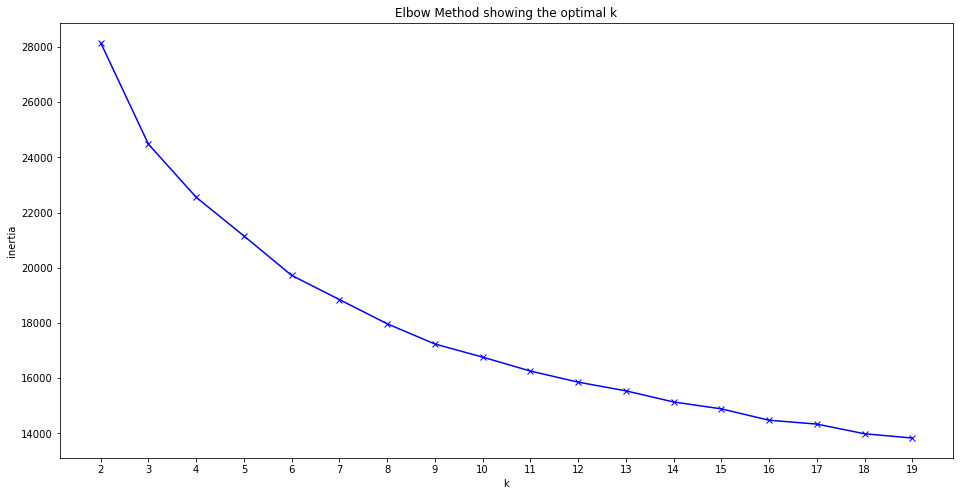

In [95]:
import numpy as np
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

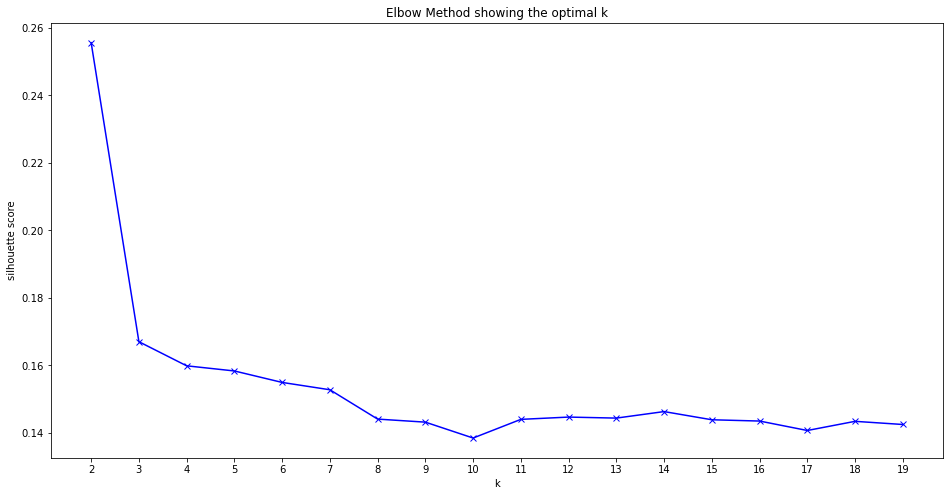

In [96]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [97]:
# I choose 6 clusters

kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)
pd.Series(clusters).value_counts().sort_index()

0    394
1    705
2    281
3    594
4    702
5    528
dtype: int64

In [98]:
# db_songs = pd.concat([pd.DataFrame(X, 
#            columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
#            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']), 
#            pd.DataFrame(clusters, columns=["cluster"])], axis=1)
audio_clustered = pd.concat([pd.DataFrame(X, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']), pd.DataFrame(clusters, columns=["cluster"])], axis=1)
db_songs = pd.concat([db_songs, pd.DataFrame(clusters, columns=["cluster"])], axis=1)

In [99]:
# saving
with open("audio_clustered.txt", "wb") as f:   #Pickling
    pickle.dump(audio_clustered, f)

with open("db_songs_clustered.txt", "wb") as f:   #Pickling
    pickle.dump(db_songs, f)

In [100]:
audio_clustered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.534,0.725,1.0,-3.906,1.0,0.0460,0.091000,0.000000,0.0264,0.550,88.098,1
1,0.788,0.859,2.0,-2.724,1.0,0.0856,0.281000,0.000000,0.0424,0.822,141.020,1
2,0.796,0.798,1.0,-6.312,1.0,0.0317,0.034000,0.000042,0.0952,0.942,116.032,1
3,0.796,0.798,1.0,-6.312,1.0,0.0317,0.034000,0.000042,0.0952,0.942,116.032,1
4,0.796,0.798,1.0,-6.312,1.0,0.0317,0.034000,0.000042,0.0952,0.942,116.032,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3199,0.509,0.987,10.0,-3.198,0.0,0.0886,0.000081,0.000928,0.1190,0.647,138.039,4
3200,0.576,0.963,1.0,-3.950,1.0,0.1020,0.192000,0.000000,0.0870,0.961,137.331,1
3201,0.768,0.852,4.0,-6.215,1.0,0.0380,0.213000,0.000074,0.0723,0.867,128.374,1
3202,0.451,0.852,2.0,-3.409,0.0,0.0418,0.000652,0.000003,0.2510,0.601,141.935,3


In [101]:
# db_songs = pd.concat([pd.DataFrame(X_scaled, 
#                     columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
#                     'instrumentalness', 'liveness', 'valence', 'tempo']), 
#                     pd.DataFrame(clusters, columns=["cluster"])], axis=1)
audio_scaled_clustered = pd.concat([pd.DataFrame(X_scaled, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']), pd.DataFrame(clusters, columns=["cluster"])], axis=1)

In [102]:
from sklearn.model_selection import train_test_split

X = audio_scaled_clustered.drop(['cluster'], axis=1)
y = audio_scaled_clustered['cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=17
)

### Applying PCA

In [103]:
from sklearn.decomposition import PCA

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_.round(2)

array([0.27, 0.16, 0.12, 0.09, 0.08, 0.08, 0.07, 0.06, 0.04, 0.02, 0.01])

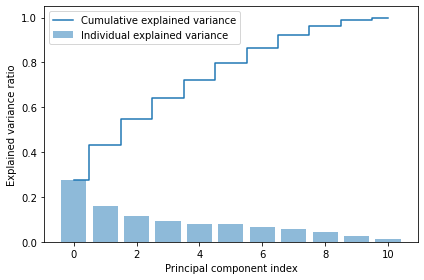

In [106]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [107]:
pca = PCA(0.9)
pca.fit(X_train)

PCA(n_components=0.9)

In [108]:
pca.explained_variance_ratio_

array([0.27380884, 0.1581226 , 0.11682615, 0.09178162, 0.07919578,
       0.07782072, 0.06782621, 0.05559729])

In [109]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Modelling with KNN: k-nearest neighbors

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)

In [111]:
from sklearn.metrics import confusion_matrix
# with PCA
confusion_matrix(y_test, y_pred_pca)

array([[ 84,   1,   3,   0,   5,   0],
       [  0, 123,   0,   1,   0,   2],
       [  0,   5,  54,   5,   5,   0],
       [  0,   5,   0, 107,   4,   1],
       [  6,   0,   0,   0, 122,   0],
       [  1,   1,   0,   0,   7,  99]], dtype=int64)

In [112]:
# saving the model
pickle.dump(knn, open('model.p', 'wb'))
pickle.dump(pca, open('pca_model.p', 'wb'))

In [113]:
(X_train)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2056,0.856594,-0.113206,-1.193546,-0.124170,0.916114,2.522958,-0.408058,-0.648532,1.824956,0.741639,-1.448592
577,-0.211031,1.152861,-0.373154,1.191273,0.916114,-0.383960,-0.747062,0.166743,0.220413,-0.427620,1.462494
188,0.487290,0.519827,-0.099690,1.108803,0.916114,-0.551593,-0.105282,-0.648532,-0.083149,1.049126,-0.883422
327,1.340047,-0.197611,0.720702,-0.047694,0.916114,-0.513495,-0.747395,1.455403,-0.814589,1.271649,-0.258139
1858,-0.909351,0.802582,-1.193546,0.502026,0.916114,2.522958,-0.651960,-0.648532,-0.191564,-0.609685,-0.312112
...,...,...,...,...,...,...,...,...,...,...,...
1337,-0.452757,1.152861,0.720702,1.143805,0.916114,-0.609694,-0.729538,-0.612882,-0.839163,-0.949539,-1.275708
406,0.211990,0.536708,0.447238,-0.024679,-1.091567,-0.661127,-0.740303,-0.629947,-0.133743,-0.217235,-0.099414
1414,-0.190887,0.802582,-1.467010,0.463907,0.916114,-0.560166,-0.747227,-0.227745,-0.668590,-0.900988,1.434897
2191,-1.359231,0.739279,-0.920082,0.422193,0.916114,-0.629695,-0.740640,-0.648532,-0.321662,0.191399,1.448335
